<a href="https://colab.research.google.com/github/enakai00/rl_book_solutions/blob/master/Exercise_6_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6.4 : Solution

In [0]:
import numpy as np
from numpy import random
from pandas import DataFrame

## TD(0)

In [0]:
def trial(alpha = 0.1):
  v = np.array([0.5] * 5)
  result = [v.copy()]
  for _ in range(100):
    s = 2
    while True:
      _s = s
      s += random.randint(2) * 2 -1
      if s == -1:
        r = 0
        v[_s] = v[_s] + alpha * (r + 0 - v[_s])
        break
      if s == 5:
        r = 1
        v[_s] = v[_s] + alpha * (r + 0 - v[_s]) 
        break
      else:
        r  = 0
        v[_s] = v[_s] + alpha * (r + v[s] - v[_s]) 
    result.append(v.copy())
  return result

In [0]:
result = trial()

[Text(0, 0, 'A'),
 Text(0, 0, 'B'),
 Text(0, 0, 'C'),
 Text(0, 0, 'D'),
 Text(0, 0, 'E')]

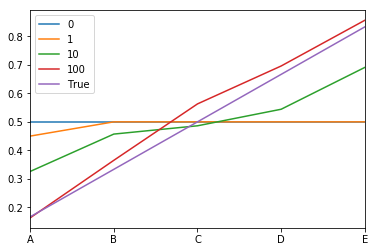

In [94]:
df = DataFrame({i:result[i] for i in [0, 1, 10, 100]})
df['True'] = [1/6, 2/6, 3/6, 4/6, 5/6]
df.plot(xticks=range(5)).set_xticklabels(['A', 'B', 'C', 'D', 'E'])

In [0]:
def trial2(alpha = 0.1):
  v_true = np.array([1/6, 2/6, 3/6, 4/6, 5/6])
  v = np.array([0.5] * 5)
  result = [np.sqrt(np.sum((v-v_true)**2)/5)]

  for _ in range(100):
    s = 2
    while True:
      _s = s
      s += random.randint(2) * 2 -1
      if s == -1:
        r = 0
        v[_s] = v[_s] + alpha * (r + 0 - v[_s])
        break
      if s == 5:
        r = 1
        v[_s] = v[_s] + alpha * (r + 0 - v[_s]) 
        break
      else:
        r  = 0
        v[_s] = v[_s] + alpha * (r + v[s] - v[_s]) 
    result.append(np.sqrt(np.sum((v-v_true)**2)/5))
  return result

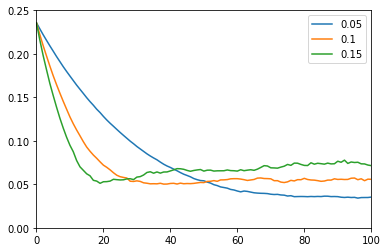

In [96]:
df = DataFrame()
for alpha in [0.05, 0.1, 0.15]:
  results = []
  for _ in range(100):
    results.append(trial2(alpha))
  df[str(alpha)] = np.mean(results, axis=0)
df.plot(ylim=(0,0.25))

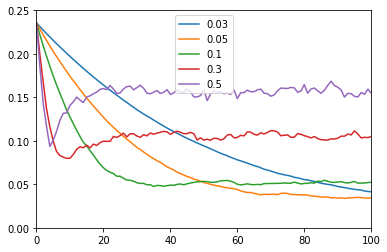

In [97]:
df = DataFrame()
for alpha in [0.03, 0.05, 0.1, 0.3, 0.5]:
  results = []
  for _ in range(100):
    results.append(trial2(alpha))
  df[str(alpha)] = np.mean(results, axis=0)
df.plot(ylim=(0,0.25))

## Monte Carlo

In [0]:
def trial3(alpha = 0.1):
  v_true = np.array([1/6, 2/6, 3/6, 4/6, 5/6])
  v = np.array([0.5] * 5)
  result = [np.sqrt(np.sum((v-v_true)**2)/5)]

  def update_v(path, r):
    for s in path:
      v[s] = v[s] + alpha * (r - v[s])
    result.append(np.sqrt(np.sum((v-v_true)**2)/5))

  for _ in range(100):
    s = 2
    path = [s]
    while True:
      _s = s
      s += random.randint(2) * 2 -1
      if s == -1:
        update_v(path, 0)
        break
      if s == 5:
        update_v(path, 1)
        break
      else:
        path.append(s)
  return result

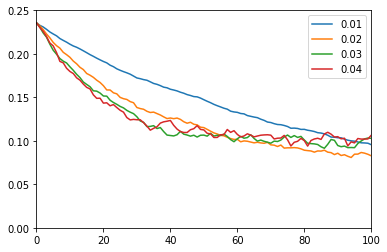

In [111]:
df = DataFrame()
for alpha in [0.01, 0.02, 0.03, 0.04]:
  results = []
  for _ in range(100):
    results.append(trial3(alpha))
  df[str(alpha)] = np.mean(results, axis=0)
df.plot(ylim=(0,0.25))

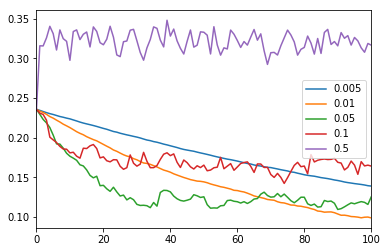

In [116]:
df = DataFrame()
for alpha in [0.005, 0.01, 0.05, 0.1, 0.5]:
  results = []
  for _ in range(100):
    results.append(trial3(alpha))
  df[str(alpha)] = np.mean(results, axis=0)
df.plot()#ylim=(0,0.25))